### Following Umakantha neuron paper, look at both mean / std of noise correlations

In [1]:
import sys
sys.path.append("/auto/users/hellerc/code/projects/nat_pupil_ms")
import load_results as ld
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.size'] = 8

In [8]:
# load results
rsc = ld.load_noise_correlation("rsc_ev")

In [9]:
rsc.keys()

Index(['all', 'p_all', 'gm_all', 'bp', 'p_bp', 'gm_bp', 'sp', 'p_sp', 'gm_sp',
       'site', 'stim', 'mean_pupil_range', 'batch'],
      dtype='object')

In [19]:
mask = (rsc['gm_bp']>0.0) & (rsc['gm_sp']>0.0) #& (rsc["p_all"]<0.01)
bpm = rsc[mask].groupby(by=["site", "batch"]).mean()["bp"]
spm = rsc[mask].groupby(by=["site", "batch"]).mean()["sp"]
bpsd = rsc[mask].groupby(by=["site", "batch"]).std()["bp"]
spsd = rsc[mask].groupby(by=["site", "batch"]).std()["sp"]

Text(0.5, 1.0, '$r_{sc}$ mean: p=0.0186,    $r_{sc}$ std: p=0.5267')

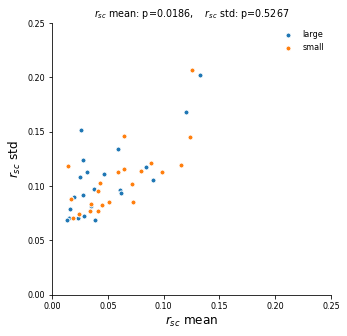

In [22]:
mask_331 = bpm.index.get_level_values(1)==322 #[True]*len(bpm) #bpm.index.get_level_values(1)==322
f, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in range(len(bpm[mask_331])):
    #ax.plot([bpm[mask_331].iloc[i],spm[mask_331].iloc[i]], [bpsd[mask_331].iloc[i],spsd[mask_331].iloc[i]],  "k-", zorder=-1)
    x, y = [spm[mask_331].iloc[i], spsd[mask_331].iloc[i]]
    dx, dy = [bpm[mask_331].iloc[i]-spm[mask_331].iloc[i], bpsd[mask_331].iloc[i]-spsd[mask_331].iloc[i]]
    #ax.arrow(x, y, dx, dy, color="k", alpha=0.5, lw=0.5, **{"length_includes_head": True, "width": 0.002})
ax.scatter(bpm[mask_331], bpsd[mask_331], color="tab:blue", edgecolor="white", s=25, label="large", alpha=1)
ax.scatter(spm[mask_331], spsd[mask_331], color="tab:orange", edgecolor="white", s=25, label="small", alpha=1)
ax.legend(frameon=False)

ax.set_xlim((0, 0.25))
ax.set_ylim((0, 0.25))
ax.set_xlabel(r"$r_{sc}$ mean", fontsize=12)
ax.set_ylabel(r"$r_{sc}$ std", fontsize=12)
mean_pval = np.round(ss.wilcoxon(bpm[mask_331], spm[mask_331]).pvalue, 4)
std_pval = np.round(ss.wilcoxon(bpsd[mask_331], spsd[mask_331]).pvalue, 4)
ax.set_title(r"$r_{sc}$ mean: p=%s,    $r_{sc}$ std: p=%s" % (mean_pval, std_pval)) 
